# KNN USING using classification and regression
## By:  Vedant Taparia
## Roll no:  122
## Batch: TMB12

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## Feature enginering

In [27]:
fx=pd.read_csv('xdata.csv')
fy=pd.read_csv('ydata.csv')

In [28]:
fx.head()

,0,3.48210557,2.420391788
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [29]:
fy.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [30]:
X=fx.values
testX=fx.values
testX=testX[396:402]
y_actual=fy.values
y_actual=y_actual[396:402]
Y=fy.values
X=X[0:395]
Y=Y[0:395]
print(X[:3])
print(Y[:3])
print("")
print(testX.shape)
print(X.shape)
print(Y.shape)

[[1.         3.516279   3.71975047]
 [2.         4.60649561 3.41437943]
 [3.         4.67701056 3.04724443]]
[[1 0]
 [2 0]
 [3 0]]

(6, 3)
(395, 3)
(395, 2)


In [31]:
print(y_actual)

[[397   1]
 [398   1]
 [399   1]
 [400   0]
 [401   0]
 [402   0]]


In [32]:
print(fx.isnull().sum())

0              0
3.48210557     0
2.420391788    0
dtype: int64


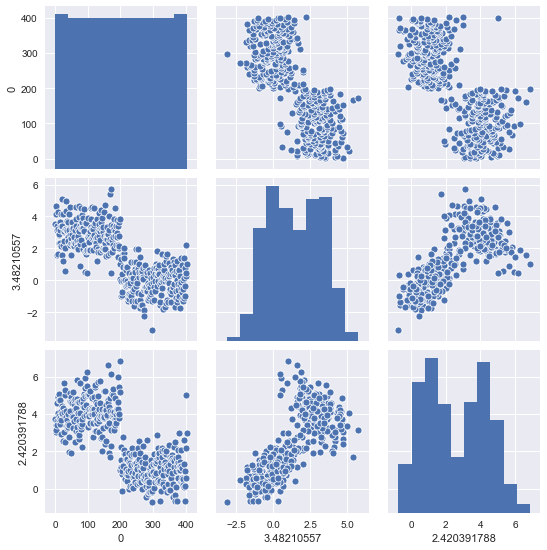

In [33]:
sns.pairplot(fx)

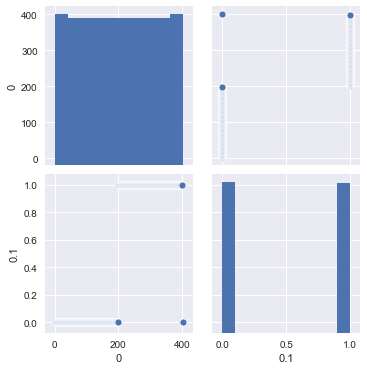

In [34]:
sns.pairplot(fy)

In [35]:
X= X[:,1:]
Y =Y[:,1:].reshape((-1,))
testX= testX[:,1:]
y_actual =y_actual[:,1:].reshape((-1,))
print(Y.shape)
print(X.shape)
print(y_actual.shape)
print(testX.shape)

(395,)
(395, 2)
(6,)
(6, 2)


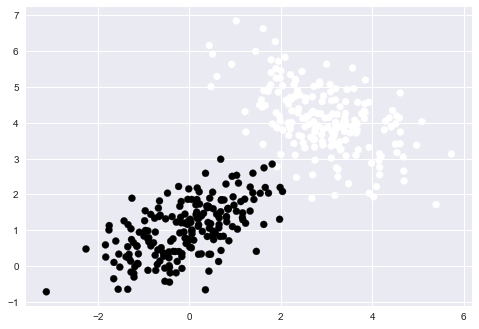

In [36]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

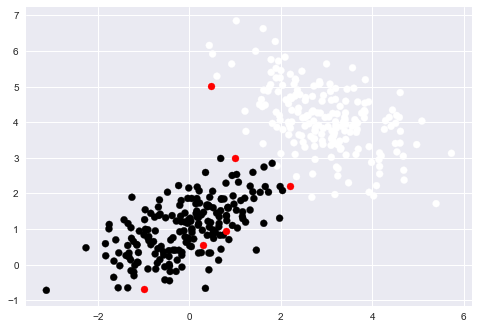

In [37]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(testX[:,0],testX[:,1],color='red')

## k-NN using classification method

In [78]:
def euc_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,querypoint,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = euc_dist(querypoint,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    nearest = new_vals[0][np.argmax(new_vals[1])]
    return nearest


In [79]:
y_pred=[]
for n in range(6):
    print(knn(X,Y,testX[n],5))
    y_pred.append(knn(X,Y,testX[n],5))

1.0
1.0
1.0
0.0
1.0
1.0


In [80]:
for n in range(6):
    print("Predicted values using KNN-classifier at",n)
    print(int(y_pred[n]))
    print("Actual values using KNN-classifier at",n)
    print(int(y_actual[n]))

Predicted values using KNN-classifier at 0
1
Actual values using KNN-classifier at 0
1
Predicted values using KNN-classifier at 1
1
Actual values using KNN-classifier at 1
1
Predicted values using KNN-classifier at 2
1
Actual values using KNN-classifier at 2
1
Predicted values using KNN-classifier at 3
0
Actual values using KNN-classifier at 3
0
Predicted values using KNN-classifier at 4
1
Actual values using KNN-classifier at 4
0
Predicted values using KNN-classifier at 5
1
Actual values using KNN-classifier at 5
0


In [81]:
print(X[0])

[3.516279   3.71975047]


actual plots of querys


[]

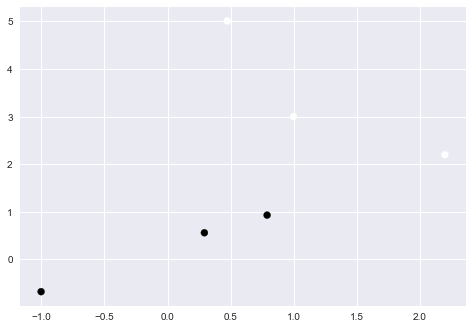

In [82]:
print("actual plots of querys")
plt.scatter(testX[:,0],testX[:,1],c=y_actual)
plt.plot()

predicted plots querys


[]

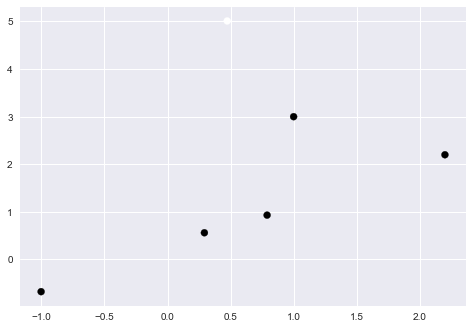

In [83]:
print("predicted plots querys")
plt.scatter(testX[:,0],testX[:,1],c=y_pred)
plt.plot()

## Prescision, Recall and Accuracy

In [84]:
def pres(actual,pred,x):
    tp=0
    fp=0
    i=0
    for item in actual:
        if item==x and pred[i]==x:
            tp+=1
        if item!=x and pred[i]==x:
            fp+=1
        i+=1
    return tp/(tp+fp)

def recall(actual,pred,x):
    tp=0
    fn=0
    i=0
    for item in actual:
        if item==x and pred[i]==x:
            tp+=1
        if item==x and pred[i]!=x:
            fn+=1
        i+=1
    return tp/(tp+fn)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred))



              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [86]:
print("Values from self created function:")
print("For prescion at 0:",pres(y_actual,y_pred,0))
print("For prescion at 1:",pres(y_actual,y_pred,1))
print("For recall at 0:",recall(y_actual,y_pred,0))
print("For recall at 1:",recall(y_actual,y_pred,1))

Values from self created function:
For prescion at 0: 1.0
For prescion at 1: 0.6
For recall at 0: 0.3333333333333333
For recall at 1: 1.0


## Confusion matrix

[[1 2]
 [0 3]]


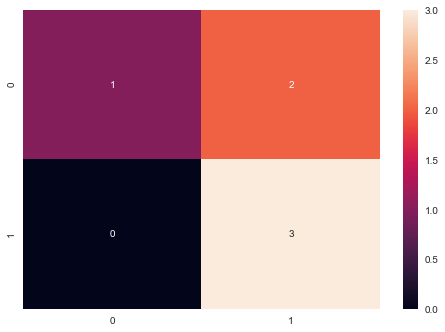

In [87]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_actual,y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)

## k-NN using regression

In [88]:
def Knn_Regression(x,y,querypoint,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = euc_dist(querypoint,x[i])
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    vals_sum = np.sum(vals)/k
    return knn(x,y,vals_sum,k)
    


In [89]:
pred_reg=[]
for n in range(6):
    print(Knn_Regression(X,Y,testX[n],5))
    pred_reg.append(Knn_Regression(X,Y,testX[n],5))

1.0
1.0
1.0
1.0
1.0
1.0


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,pred_reg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



predicted plots querys


[]

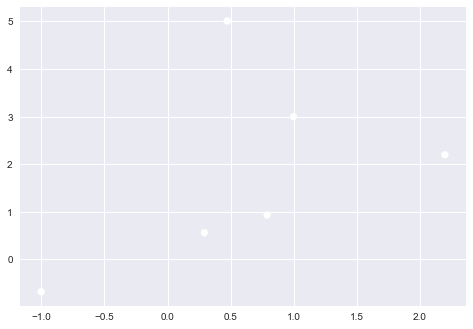

In [66]:
print("predicted plots querys")
plt.scatter(testX[:,0],testX[:,1],c=pred_reg)
plt.plot()

[[0 3]
 [0 3]]


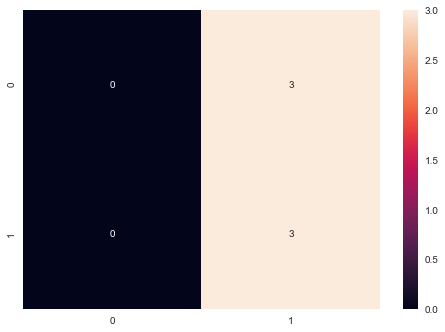

In [68]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_actual,pred_reg)
print(cf_matrix)
sns.heatmap(cf_matrix,annot=True)